In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import requests

# setting seaborn
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

warnings.filterwarnings('ignore')

In [12]:
# read data
counter = pd.read_csv('E:/Projects/Photocopier Data Analysis/1. counter photocopy machine.csv')
transaction = pd.read_csv('E:/Projects/Photocopier Data Analysis/2. transaction item photocopy.csv')

In [13]:
# check counter data type
counter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     46 non-null     object 
 1   counter  46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 868.0+ bytes


In [14]:
# transform date to datetime date type
counter['date'] = pd.to_datetime(counter['date']).dt.date

In [15]:
# check transaction data type
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   transaction   7848 non-null   object 
 1   date          7848 non-null   object 
 2   item_code     7848 non-null   object 
 3   item          7848 non-null   object 
 4   quantity      7848 non-null   float64
 5   unit          7848 non-null   object 
 6   payment_type  7848 non-null   object 
 7   price         7848 non-null   object 
 8   income        7848 non-null   float64
dtypes: float64(2), object(7)
memory usage: 551.9+ KB


In [16]:
# create function to transform price datatype to float
def transform_price(x):
    try:
        x = float(x.split(',')[0])
        msg = x
    except:
        None
    return msg

# apply the function
transaction['price'] = transaction['price'].apply(transform_price)

# transform date to datetime data type
transaction['date'] = pd.to_datetime(transaction['date']).dt.date

In [17]:
# prepare the data
task1 = transaction.groupby(['date']).agg({'quantity':np.sum,'price':np.mean,'income':np.sum}).reset_index()
task1 = counter.merge(task1, how='left', on='date')
task1.dropna(axis=0, inplace=True)
task1 = task1[task1.index>=5]

# show 5 rows 
task1.head()

,date,counter,quantity,price,income
5,2024-01-20,15198.0,1544.0,250.000000,386000.0
6,2024-01-22,16904.0,8719.0,260.526316,2481350.0
7,2024-01-23,10098.0,3872.0,270.833333,977650.0
8,2024-01-25,13207.0,5198.0,311.904762,1316150.0
9,2024-01-26,13959.0,24206.0,428.301887,9888850.0


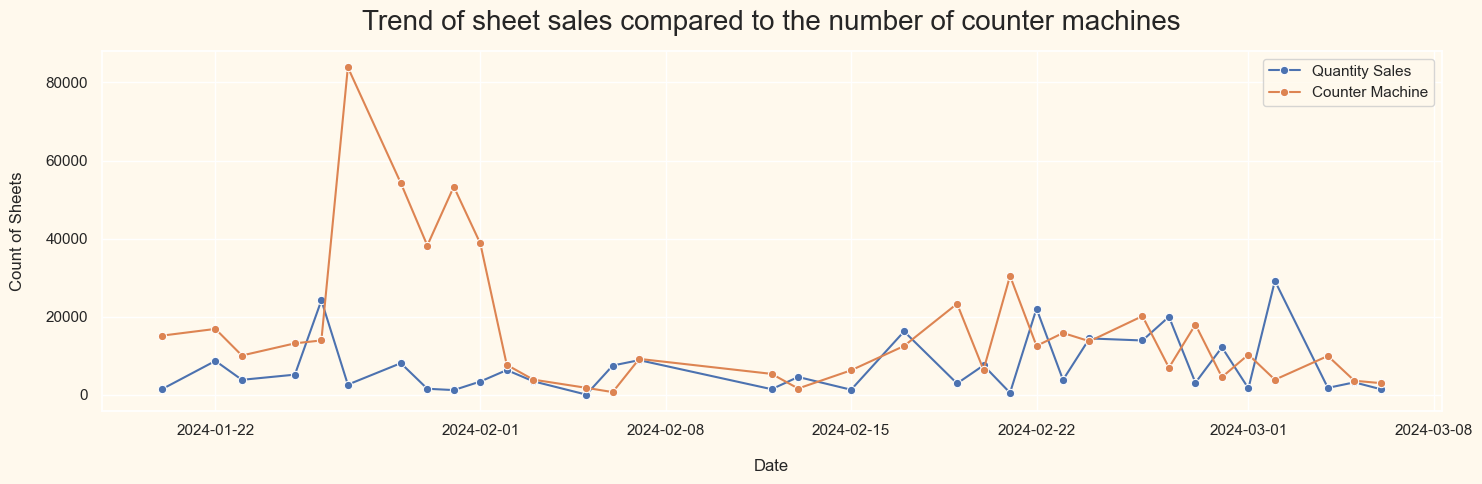

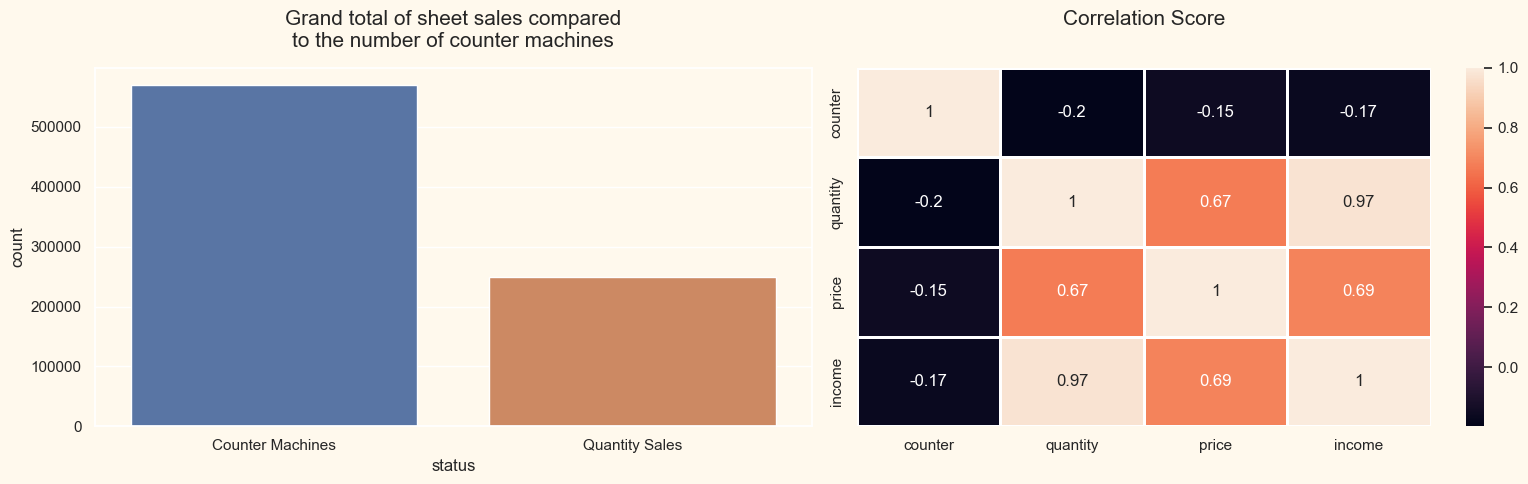

In [18]:
# visualize the trend 
plt.figure(figsize=(15, 5))

plt.title('Trend of sheet sales compared to the number of counter machines', fontsize=20, pad=15)

sns.lineplot(task1, x='date', y='quantity', label='Quantity Sales', marker='o')
sns.lineplot(task1, x='date', y='counter', label='Counter Machine', marker='o')

plt.ylabel('Count of Sheets', fontsize=12, labelpad=15)
plt.xlabel('Date', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()

# visualize the correlation score
corr = task1.select_dtypes('number').corr()
bar = pd.DataFrame({
    'status':['Counter Machines','Quantity Sales'], 
    'count':[task1.counter.sum(), task1.quantity.sum()]
})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# barrplot
ax[0].set_title('Grand total of sheet sales compared\nto the number of counter machines', pad=15, fontsize=15)
sns.barplot(bar, x='status', y='count', ax=ax[0])

# correlation
ax[1].set_title('Correlation Score\n', fontsize=15, pad=15)
sns.heatmap(corr, annot=True, linewidth=2, ax=ax[1])

plt.tight_layout()
plt.show()